# Ocean Data Challenge
## AutoInsight Challenge: Navigating Through Doug’s Car Scores
### EDA

### Luca Ordronneau

# Import Librairies

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load DougScore dataset

In [2]:
DATA_FILE = "./data/DougScore.csv"

In [3]:
data = pd.read_csv(DATA_FILE)

In [4]:
# Drop the unnecessary rows
df = data.iloc[2:].copy()

columns = [
    'Year', 'Brand', 'Model', 'Styling', 'Acceleration', 'Handling', 'Fun_Factor', 
    'Cool_Factor', 'Weekend_Total', 'Features', 'Comfort', 'Quality', 'Practicality', 
    'Value', 'Daily_Total', 'DougScore', 'Video_Link', 'Filming_Location', 'State', 'Vehicle_Country'
]
df.columns = columns

df.reset_index(drop=True, inplace=True)

# Convert columns to appropriate data types
numerical_columns = [
    'Year', 'Styling', 'Acceleration', 'Handling', 'Fun_Factor', 'Cool_Factor',
    'Weekend_Total', 'Features', 'Comfort', 'Quality', 'Practicality', 'Value', 
    'Daily_Total', 'DougScore'
]
df[numerical_columns] = df[numerical_columns].astype(float)

df.head()


,Year,Brand,Model,Styling,Acceleration,Handling,Fun_Factor,Cool_Factor,Weekend_Total,Features,Comfort,Quality,Practicality,Value,Daily_Total,DougScore,Video_Link,Filming_Location,State,Vehicle_Country
0,2020.0,McLaren,Speedtail,8.0,10.0,10.0,10.0,10.0,48.0,7.0,4.0,7.0,2.0,6.0,26.0,74.0,38:57:00,Columbus,Ohio,UK
1,1994.0,McLaren,F1,8.0,9.0,10.0,10.0,10.0,47.0,2.0,3.0,9.0,3.0,10.0,27.0,74.0,39:50:00,Burbank,California,UK
2,2022.0,Lucid,Air Dream Edition,7.0,10.0,6.0,7.0,8.0,38.0,9.0,8.0,7.0,5.0,6.0,35.0,73.0,39:40:00,Los Angeles,California,USA
3,2022.0,GMC,Hummer EV Pickup,5.0,9.0,4.0,9.0,7.0,34.0,9.0,7.0,7.0,9.0,7.0,39.0,73.0,33:42:00,Detroit,Michigan,USA
4,2021.0,Rivian,R1T,7.0,9.0,5.0,9.0,7.0,37.0,7.0,6.0,6.0,9.0,8.0,36.0,73.0,44:48:00,San Diego,California,USA


# General Analysis

In [5]:
len(df) # NB of vehicules

585

In [6]:
df['DougScore'].mean()

56.91623931623931

In [7]:
df['DougScore'].max(), df['DougScore'].min()

(74.0, 25.0)

### Average DougScore Over Time

In [8]:
avg_doug_score_by_year = df.groupby('Year')['DougScore'].mean()

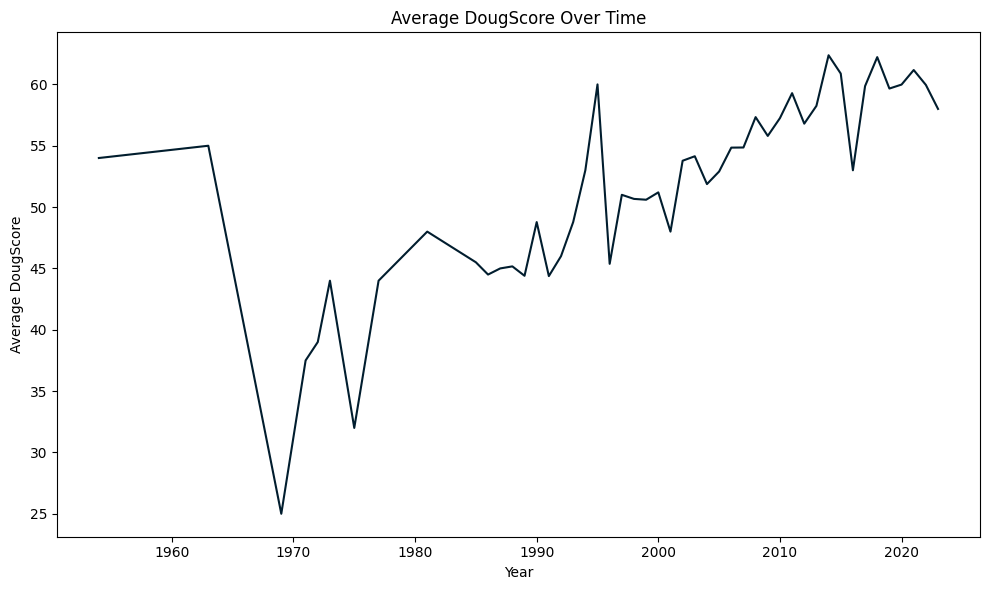

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_doug_score_by_year.index, y=avg_doug_score_by_year.values, color="#011d2e")
plt.title("Average DougScore Over Time")
plt.xlabel("Year")
plt.ylabel("Average DougScore")
plt.tight_layout()
plt.show()

### Top 20 Cars with Highest DougScore

In [10]:
# Sort the data by DougScore to get the top 15 cars with the highest score
top_20_cars = df.nlargest(20, 'DougScore')

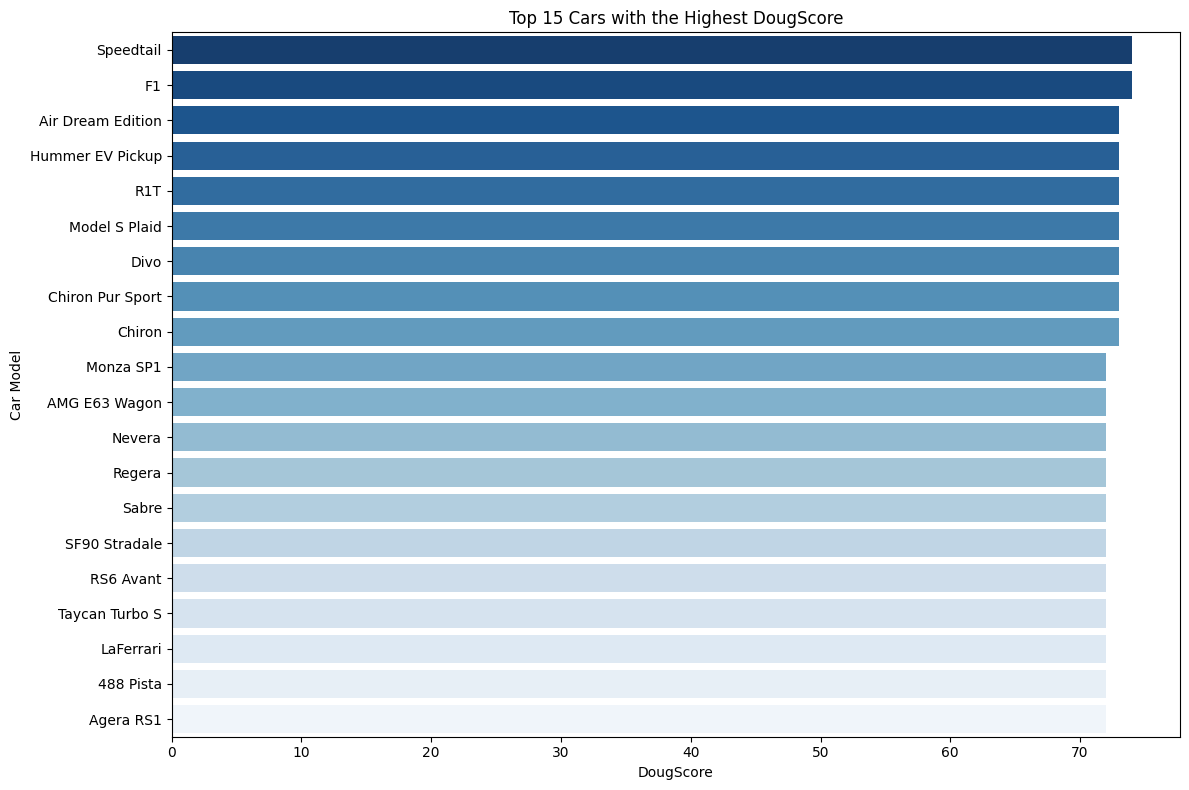

In [11]:
# Create a gradient of blues for the bars
color_gradient = sns.color_palette("Blues", 20).as_hex()
color_gradient = list(reversed(color_gradient))

# Plot the vertical bar chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x="DougScore", y=top_20_cars["Model"], data=top_20_cars, palette=color_gradient)

# Set the title and labels
plt.title("Top 15 Cars with the Highest DougScore")
plt.xlabel("DougScore")
plt.ylabel("Car Model")

# Display the plot
plt.tight_layout()
plt.show()

## Country Analysis

In [12]:
average_scores = df.groupby('Vehicle_Country')['DougScore'].mean().sort_values(ascending=False)

# Sort the countries by average scores
sorted_scores = average_scores.sort_values(ascending=True)

In [13]:
# Create the gradient color list based on the sorted scores
sorted_gradient = plt.cm.Blues(np.linspace(0.3, 1, len(sorted_scores)))

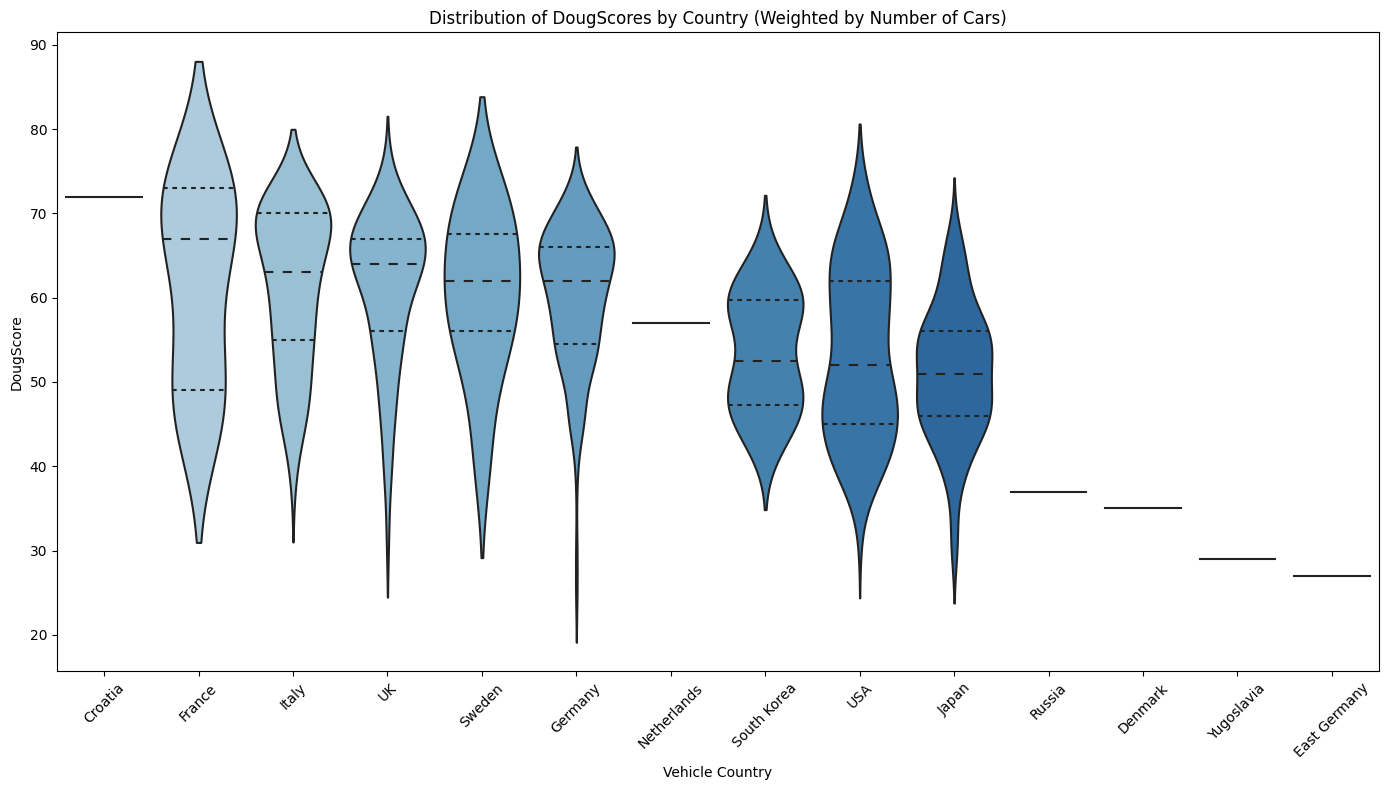

In [14]:
# Calculate the number of cars for each country
country_counts = df['Vehicle_Country'].value_counts()

# Use the count of cars per country as weights for the violin plot
weights = df['Vehicle_Country'].map(country_counts)

# Create a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='Vehicle_Country', y='DougScore', scale='width', inner='quartile', order=average_scores.index, palette=sorted_gradient)
plt.xlabel('Vehicle Country')
plt.ylabel('DougScore')
plt.title('Distribution of DougScores by Country (Weighted by Number of Cars)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Relationship Analysis

### A) Fun factor, practicality, value

In [15]:
correlation_A = df[['Fun_Factor', 'Practicality', 'Value']].corr()
correlation_A

,Fun_Factor,Practicality,Value
Fun_Factor,1.000000,-0.623396,0.039603
Practicality,-0.623396,1.000000,-0.015149
Value,0.039603,-0.015149,1.000000


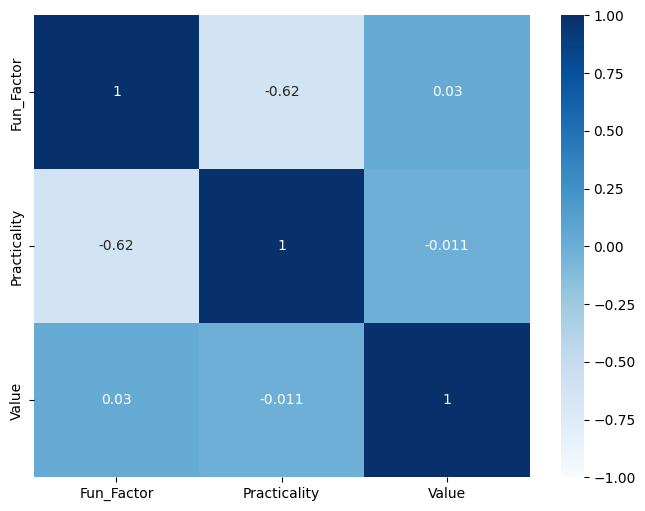

In [16]:
# Extract the relevant columns for correlation analysis
correlation_data = df[['Fun_Factor', 'Practicality', 'Value']].iloc[2:].astype(float)

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("Blues", as_cmap=True), vmin=-1, vmax=1)
# plt.title("Correlation Between Selected Categories")
plt.show()

In [17]:
top_5_Fun_Factor = df.nlargest(5, 'Fun_Factor')[['Brand', 'Model', 'Fun_Factor', 'Practicality', 'Value']]
top_5_Fun_Factor

,Brand,Model,Fun_Factor,Practicality,Value
0,McLaren,Speedtail,10.0,2.0,6.0
1,McLaren,F1,10.0,3.0,10.0
6,Bugatti,Divo,10.0,1.0,7.0
7,Bugatti,Chiron Pur Sport,10.0,1.0,6.0
8,Bugatti,Chiron,10.0,1.0,6.0


In [18]:
top_5_Fun_Practicality = df.nlargest(5, 'Practicality')[['Brand', 'Model', 'Fun_Factor', 'Practicality', 'Value']]
top_5_Fun_Practicality

,Brand,Model,Fun_Factor,Practicality,Value
170,Tesla,Model X,5.0,10.0,7.0
404,Kia,Carnival SX Prestige,1.0,10.0,8.0
423,Chrysler,Pacifica Pinnacle,1.0,10.0,8.0
424,Toyota,Sienna Platinum,1.0,10.0,8.0
559,Pontiac,Aztek,1.0,10.0,7.0


In [19]:
top_5_Fun_Value = df.nlargest(5, 'Value')[['Brand', 'Model', 'Fun_Factor', 'Practicality', 'Value']]
top_5_Fun_Value

,Brand,Model,Fun_Factor,Practicality,Value
1,McLaren,F1,10.0,3.0,10.0
239,Ford,Raptor,6.0,8.0,10.0
292,Porsche,911 Carrera 4S,7.0,3.0,10.0
309,Chevrolet,Corvette Z06 C5,7.0,2.0,10.0
353,Fiat,500 Abarth,8.0,4.0,10.0


In [20]:
# Compute the average score for the categories in Group A anCoby country, by d list the top 5 cars
df['Average_A'] = df[['Fun_Factor', 'Practicality', 'Value']].mean(axis=1)
top_5_A = df.nlargest(5, 'Average_A')[['Brand', 'Model', 'Fun_Factor', 'Practicality', 'Value', 'Average_A']]
top_5_A

,Brand,Model,Fun_Factor,Practicality,Value,Average_A
4,Rivian,R1T,9.0,9.0,8.0,8.666667
3,GMC,Hummer EV Pickup,9.0,9.0,7.0,8.333333
74,Dodge,Ram TRX,8.0,8.0,8.0,8.000000
239,Ford,Raptor,6.0,8.0,10.0,8.000000
301,Jeep,Gladiator Mojave,8.0,8.0,8.0,8.000000


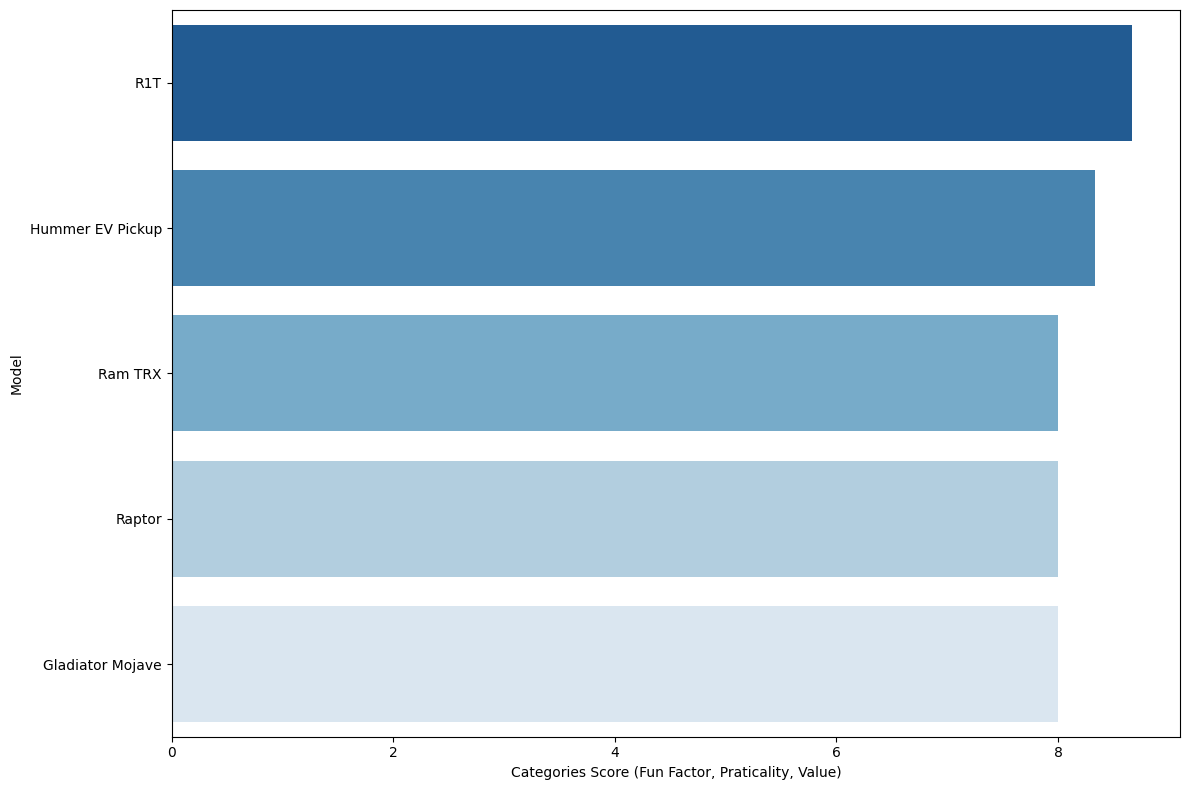

In [21]:
color_gradient = sns.color_palette("Blues", 5).as_hex()
color_gradient = list(reversed(color_gradient))

# Plot the vertical bar chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x="Average_A", y=top_5_A["Model"], data=top_5_A, palette=color_gradient)

# Set the title and labels
plt.xlabel("Categories Score (Fun Factor, Praticality, Value)")

# Display the plot
plt.tight_layout()
plt.show()

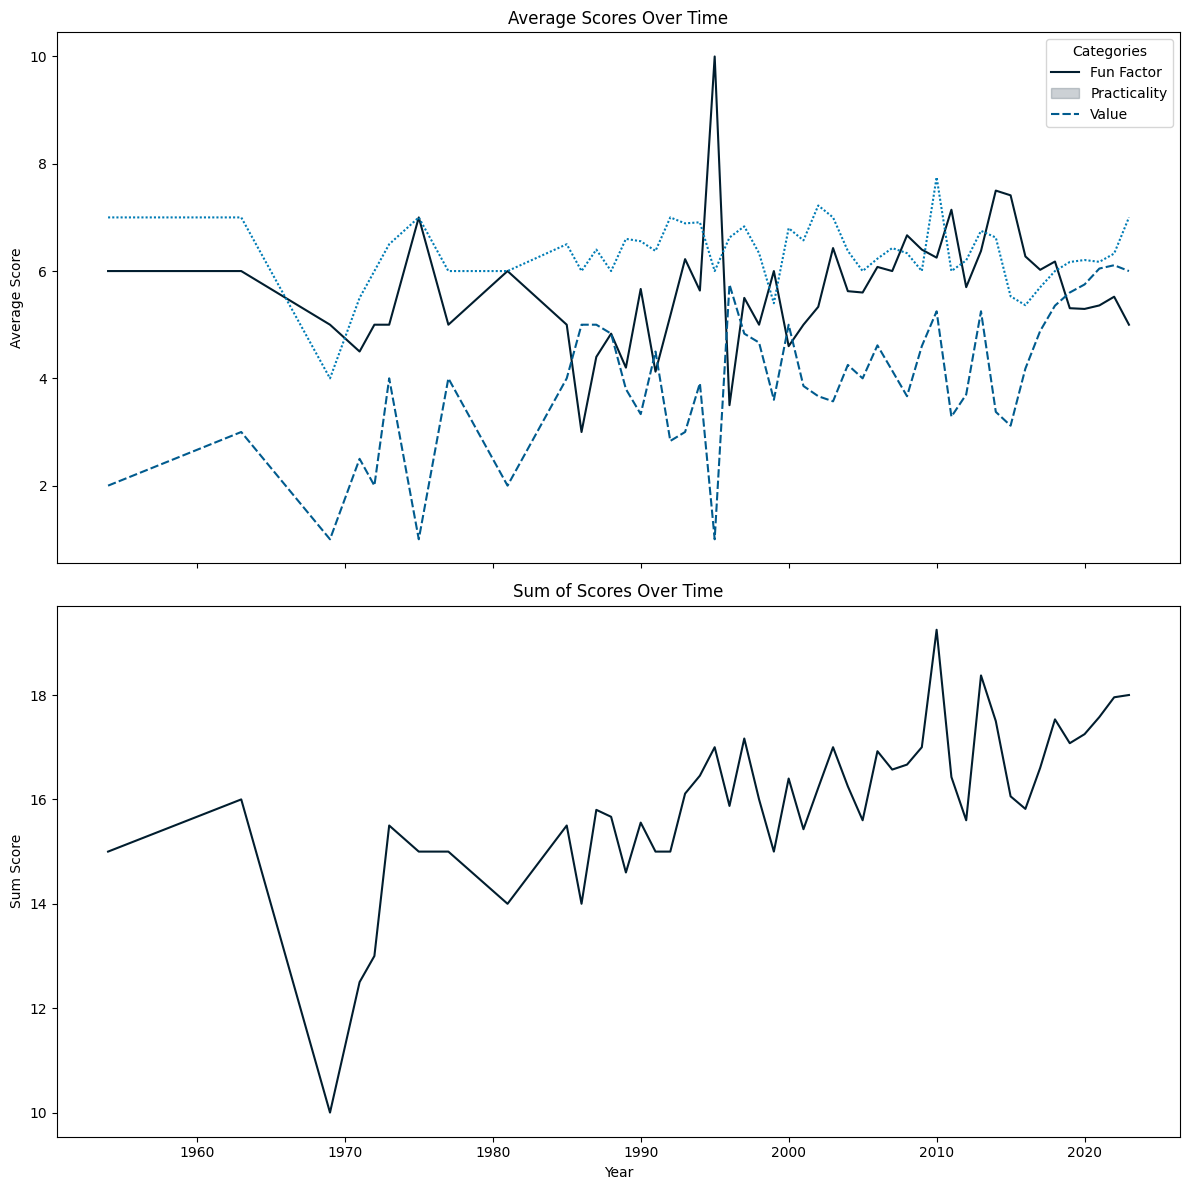

In [22]:
df['Sum_Score'] = df[['Fun_Factor', 'Practicality', 'Value']].sum(axis=1)
avg_scores_by_year = df.groupby('Year')[['Fun_Factor', 'Practicality', 'Value', 'Sum_Score']].mean()

# Define the color theme
colors = ["#011d2e", "#005b8e", "#007cb5"]

# Plotting the average scores and the sum over time using subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot the average scores on the first subplot
sns.lineplot(data=avg_scores_by_year[['Fun_Factor', 'Practicality', 'Value']], palette=colors, ax=ax1)
ax1.set_ylabel("Average Score")
ax1.set_title("Average Scores Over Time")
ax1.legend(title='Categories', labels=['Fun Factor', 'Practicality', 'Value'])
ax1.grid(False)

# Plot the sum on the second subplot
sns.lineplot(data=avg_scores_by_year['Sum_Score'], color=colors[0], ax=ax2)
ax2.set_ylabel("Sum Score")
ax2.set_title("Sum of Scores Over Time")
ax2.grid(False)

plt.tight_layout()
plt.show()



### B) Acceleration, handling, comfort

In [23]:
correlation_B = df[['Acceleration', 'Handling', 'Comfort']].corr()
correlation_B

,Acceleration,Handling,Comfort
Acceleration,1.000000,0.797478,-0.175853
Handling,0.797478,1.000000,-0.457514
Comfort,-0.175853,-0.457514,1.000000


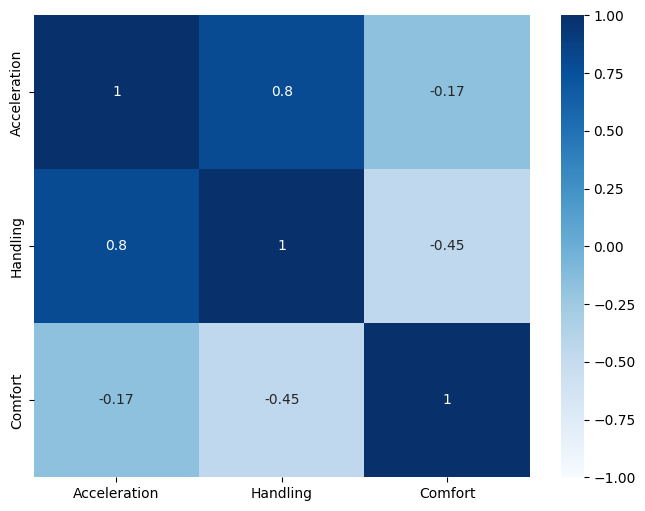

In [24]:
# Extract the relevant columns for correlation analysis
correlation_data = df[['Acceleration', 'Handling', 'Comfort']].iloc[2:].astype(float)

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("Blues", as_cmap=True), vmin=-1, vmax=1)
# plt.title("Correlation Between Selected Categories")
plt.show()

In [25]:
top_acceleration = df.nlargest(5, 'Acceleration')[['Brand', 'Model', 'Acceleration']]
top_acceleration

,Brand,Model,Acceleration
0,McLaren,Speedtail,10.0
2,Lucid,Air Dream Edition,10.0
5,Tesla,Model S Plaid,10.0
6,Bugatti,Divo,10.0
7,Bugatti,Chiron Pur Sport,10.0


In [26]:
top_handling = df.nlargest(5, 'Handling')[['Brand', 'Model', 'Handling']]
top_handling

,Brand,Model,Handling
0,McLaren,Speedtail,10.0
1,McLaren,F1,10.0
9,Ferrari,Monza SP1,10.0
11,Rimac,Nevera,10.0
12,Koenigsegg,Regera,10.0


In [27]:
top_comfort = df.nlargest(5, 'Comfort')[['Brand', 'Model', 'Comfort']]
top_comfort

,Brand,Model,Comfort
81,Rolls-Royce,Cullinan Black Badge,10.0
83,Rolls-Royce,Cullinan,10.0
86,Rolls-Royce,Phantom,10.0
127,Rolls-Royce,Dawn,10.0
165,Rolls-Royce,Wraith,10.0


In [28]:
df['Average_B'] = df[['Acceleration', 'Handling', 'Comfort']].mean(axis=1)
top_5_B = df.nlargest(5, 'Average_B')[['Brand', 'Model', 'Acceleration', 'Handling', 'Comfort', 'Average_B']]
top_5_B

,Brand,Model,Acceleration,Handling,Comfort,Average_B
0,McLaren,Speedtail,10.0,10.0,4.0,8.0
2,Lucid,Air Dream Edition,10.0,6.0,8.0,8.0
6,Bugatti,Divo,10.0,9.0,5.0,8.0
7,Bugatti,Chiron Pur Sport,10.0,9.0,5.0,8.0
8,Bugatti,Chiron,10.0,9.0,5.0,8.0


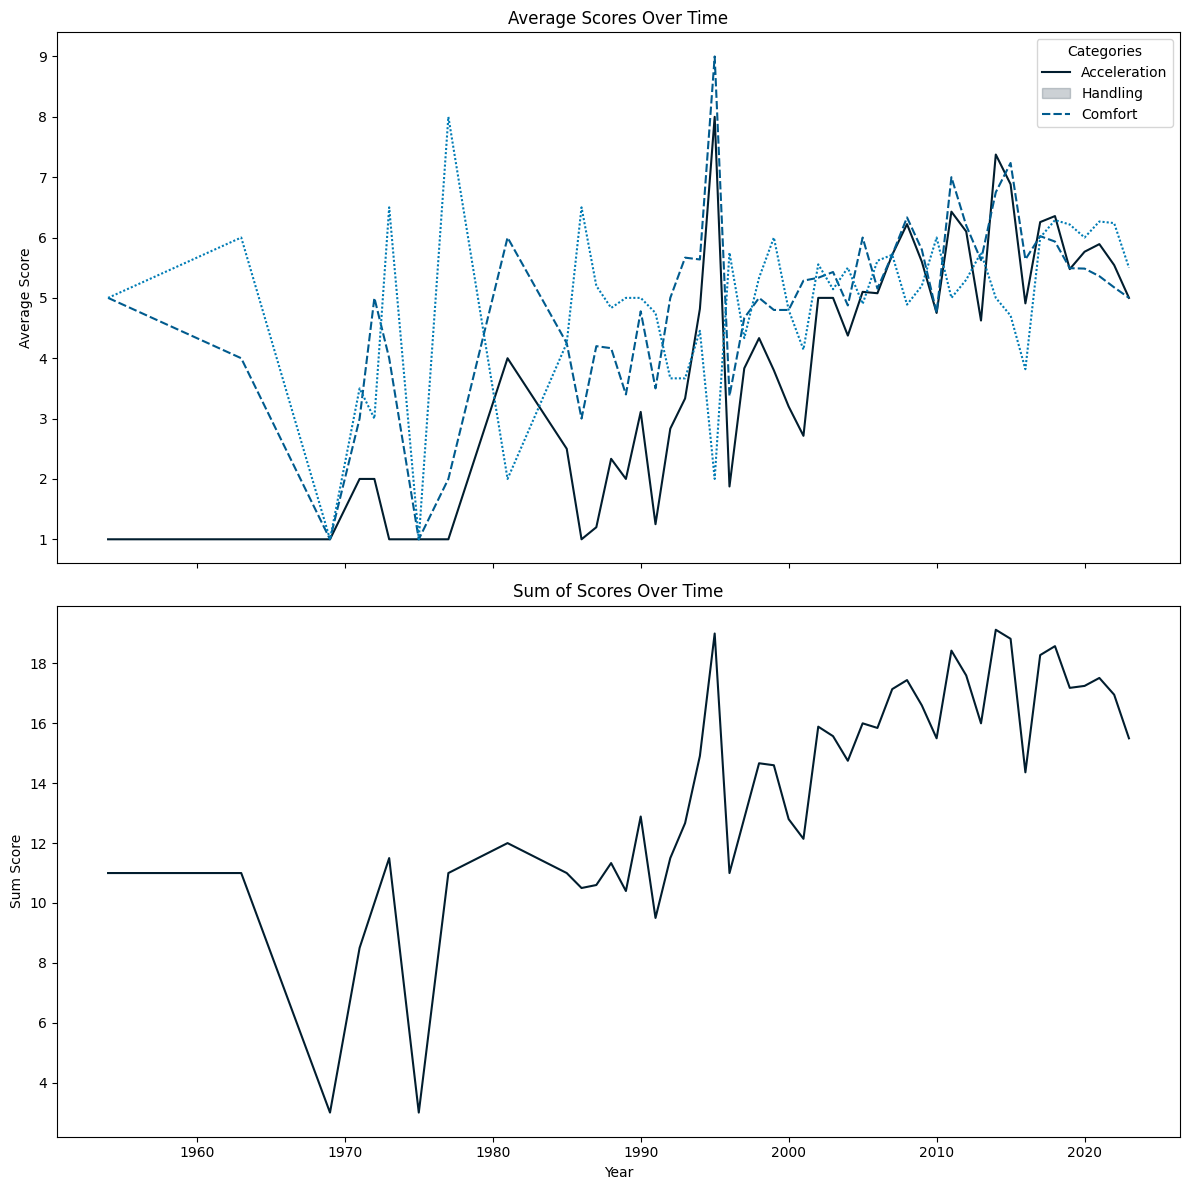

In [29]:
df['Sum_Score'] = df[['Acceleration', 'Handling', 'Comfort']].sum(axis=1)
avg_scores_by_year = df.groupby('Year')[['Acceleration', 'Handling', 'Comfort', 'Sum_Score']].mean()

# Define the color theme
colors = ["#011d2e", "#005b8e", "#007cb5"]

# Plotting the average scores and the sum over time using subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot the average scores on the first subplot
sns.lineplot(data=avg_scores_by_year[['Acceleration', 'Handling', 'Comfort']], palette=colors, ax=ax1)
ax1.set_ylabel("Average Score")
ax1.set_title("Average Scores Over Time")
ax1.legend(title='Categories', labels=['Acceleration', 'Handling', 'Comfort'])
ax1.grid(False)

# Plot the sum on the second subplot
sns.lineplot(data=avg_scores_by_year['Sum_Score'], color=colors[0], ax=ax2)
ax2.set_ylabel("Sum Score")
ax2.set_title("Sum of Scores Over Time")
ax2.grid(False)

plt.tight_layout()
plt.show()

### C) Styling, cool factor, quality

In [30]:
correlation_C = df[['Styling', 'Cool_Factor', 'Quality']].corr()
correlation_C

,Styling,Cool_Factor,Quality
Styling,1.000000,0.605803,0.208935
Cool_Factor,0.605803,1.000000,0.055731
Quality,0.208935,0.055731,1.000000


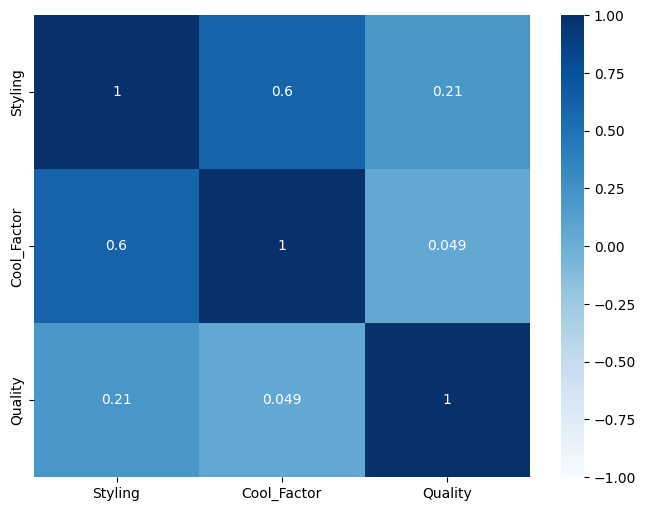

In [31]:
# Extract the relevant columns for correlation analysis
correlation_data = df[['Styling', 'Cool_Factor', 'Quality']].iloc[2:].astype(float)

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("Blues", as_cmap=True), vmin=-1, vmax=1)
# plt.title("Correlation Between Selected Categories")
plt.show()

In [32]:
top_styling = df.nlargest(5, 'Styling')[['Brand', 'Model', 'Styling']]
top_styling

,Brand,Model,Styling
117,Aston Martin,Lagonda Taraf,10.0
177,Aston Martin,Vanquish,10.0
243,BMW,Z8,10.0
262,Ferrari,F40,10.0
304,Vector,W8,10.0


In [33]:
top_cool_factor = df.nlargest(5, 'Cool_Factor')[['Brand', 'Model', 'Cool_Factor']]
top_cool_factor

,Brand,Model,Cool_Factor
0,McLaren,Speedtail,10.0
1,McLaren,F1,10.0
6,Bugatti,Divo,10.0
7,Bugatti,Chiron Pur Sport,10.0
8,Bugatti,Chiron,10.0


In [34]:
top_quality = df.nlargest(5, 'Quality')[['Brand', 'Model', 'Quality']]
top_quality

,Brand,Model,Quality
118,Lexus,LC500 Convertible,10.0
134,Lexus,LC 500,10.0
185,Lexus,LS 500h,10.0
1,McLaren,F1,9.0
37,Porsche,Carrera GT,9.0


In [35]:
df['Average_C'] = df[['Styling', 'Cool_Factor', 'Quality']].mean(axis=1)
top_5_C = df.nlargest(5, 'Average_C')[['Brand', 'Model', 'Styling', 'Cool_Factor', 'Quality', 'Average_C']]
top_5_C

,Brand,Model,Styling,Cool_Factor,Quality,Average_C
37,Porsche,Carrera GT,9.0,10.0,9.0,9.333333
1,McLaren,F1,8.0,10.0,9.0,9.000000
9,Ferrari,Monza SP1,9.0,10.0,8.0,9.000000
354,Ferrari,250 GT Lusso,10.0,9.0,8.0,9.000000
360,Mercedes-Benz,300SL Gullwing,10.0,10.0,7.0,9.000000


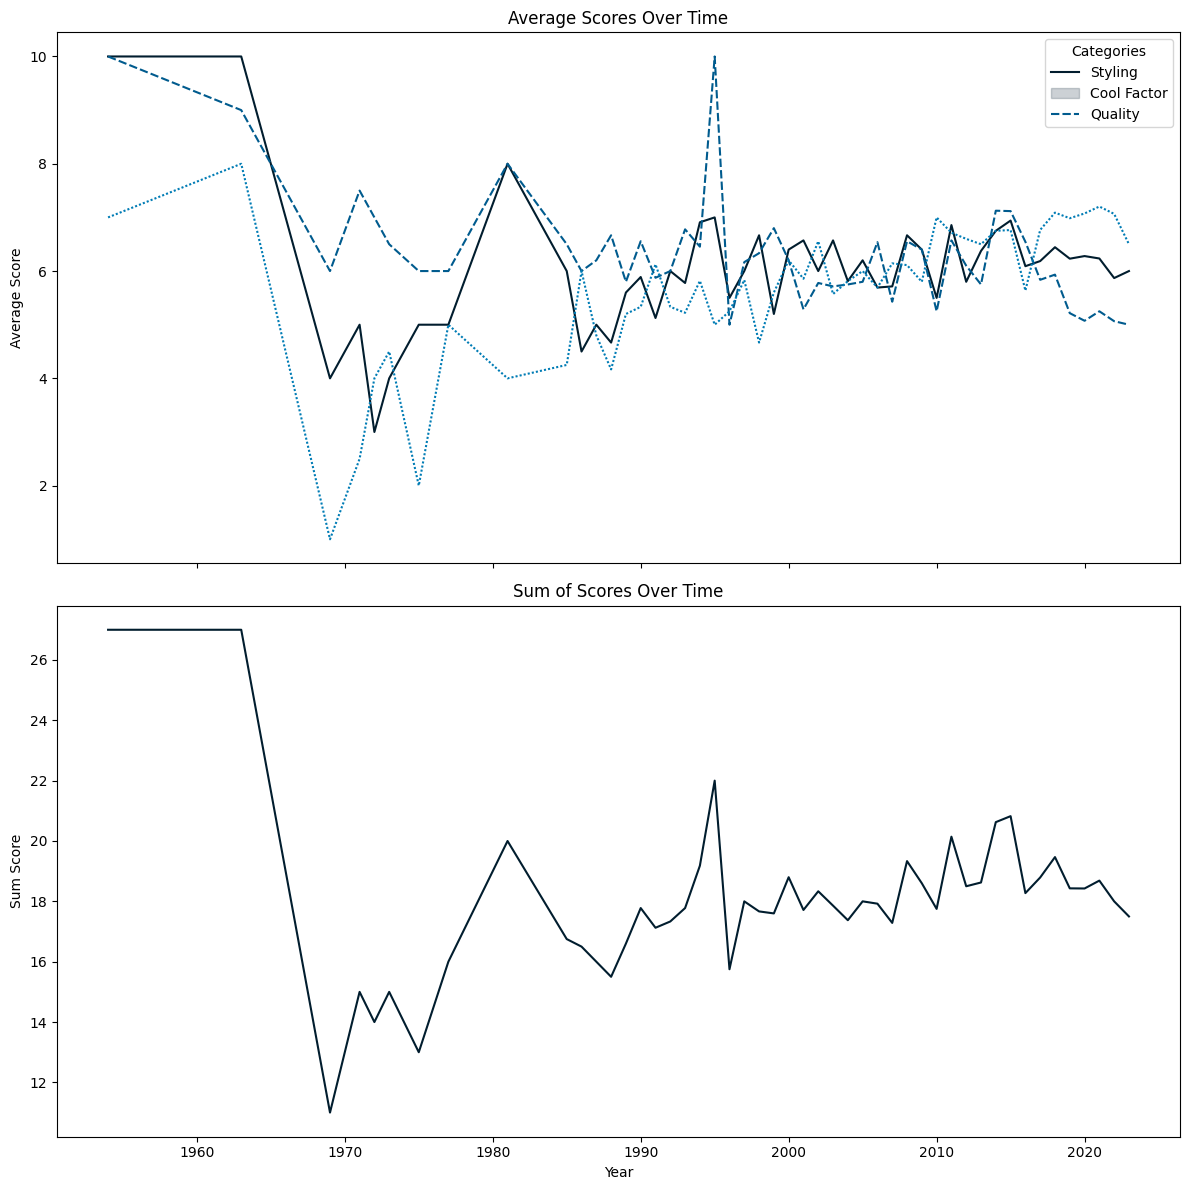

In [36]:
df['Sum_Score'] = df[['Styling', 'Cool_Factor', 'Quality']].sum(axis=1)
avg_scores_by_year = df.groupby('Year')[['Styling', 'Cool_Factor', 'Quality', 'Sum_Score']].mean()

# Define the color theme
colors = ["#011d2e", "#005b8e", "#007cb5"]

# Plotting the average scores and the sum over time using subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot the average scores on the first subplot
sns.lineplot(data=avg_scores_by_year[['Styling', 'Cool_Factor', 'Quality']], palette=colors, ax=ax1)
ax1.set_ylabel("Average Score")
ax1.set_title("Average Scores Over Time")
ax1.legend(title='Categories', labels=['Styling', 'Cool Factor', 'Quality'])
ax1.grid(False)

# Plot the sum on the second subplot
sns.lineplot(data=avg_scores_by_year['Sum_Score'], color=colors[0], ax=ax2)
ax2.set_ylabel("Sum Score")
ax2.set_title("Sum of Scores Over Time")
ax2.grid(False)

plt.tight_layout()
plt.show()

### D) Weekend score, daily score, brand

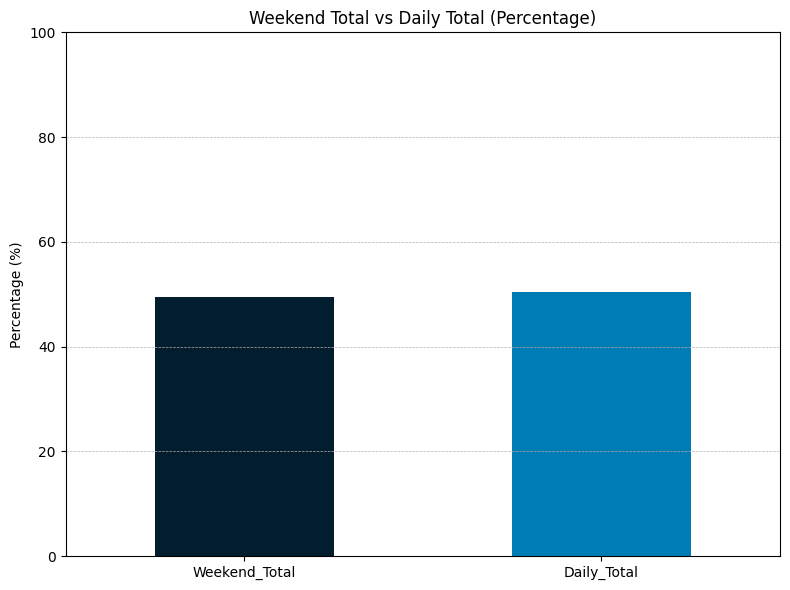

In [37]:
# Calculate the sum of Weekend Total and Daily Total
total_scores = df[['Weekend_Total', 'Daily_Total']].sum()

# Calculate percentage for each score
percentage_scores = (total_scores / total_scores.sum()) * 100

# Stacked bar chart for Weekend Total and Daily Total in percentage
plt.figure(figsize=(8, 6))
percentage_scores.plot(kind='bar', stacked=True, color=['#011d2e', '#007cb5'])

plt.title("Weekend Total vs Daily Total (Percentage)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limits to 0-100 for percentage
plt.grid(axis='y', linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

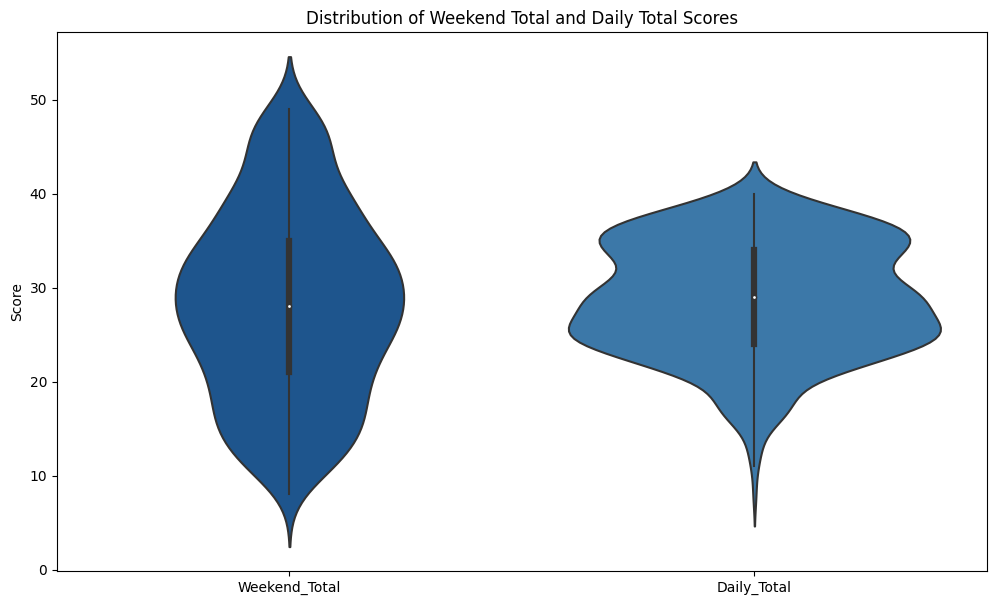

In [38]:
# Create violin plot for Weekend Total and Daily Total with specified color gradient
plt.figure(figsize=(12, 7))
sns.set_palette(sns.color_palette("Blues_r"))
sns.violinplot(data=df[['Weekend_Total', 'Daily_Total']])
plt.title('Distribution of Weekend Total and Daily Total Scores')
plt.ylabel('Score')
plt.show()

In [39]:
# Compute the correlation coefficient
correlation_coefficient = df['Weekend_Total'].corr(df['Daily_Total'])
correlation_coefficient

-0.3136994548138228

In [40]:
# Calculating average Weekend and Daily Scores for each brand
df_brand_scores = df.groupby('Brand').agg({
    'Weekend_Total': 'mean',
    'Daily_Total': 'mean'
}).reset_index()

df_brand_scores = df_brand_scores.sort_values(by=['Weekend_Total', 'Daily_Total'], ascending=False)

In [41]:
df_brand_scores['Weekend_Total'].corr(df_brand_scores['Daily_Total'])

-0.12192303649820252

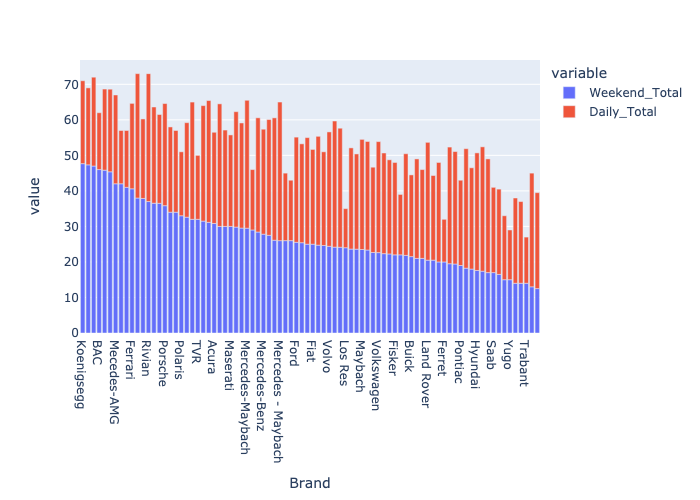

In [42]:
fig = px.bar(df_brand_scores, x="Brand", y=["Weekend_Total", "Daily_Total"])
fig.show("png")

In [43]:
top_weekend_cars = df.nlargest(5, 'Weekend_Total')[['Brand', 'Model', 'Weekend_Total']]
top_weekend_cars

,Brand,Model,Weekend_Total
9,Ferrari,Monza SP1,49.0
17,Ferrari,LaFerrari,49.0
38,McLaren,Elva,49.0
0,McLaren,Speedtail,48.0
7,Bugatti,Chiron Pur Sport,48.0


In [44]:
top_daily_cars = df.nlargest(5, 'Daily_Total')[['Brand', 'Model', 'Daily_Total']]
top_daily_cars

,Brand,Model,Daily_Total
81,Rolls-Royce,Cullinan Black Badge,40.0
83,Rolls-Royce,Cullinan,40.0
228,Jeep,Grand Wagoneer,40.0
230,BMW,X7,40.0
404,Kia,Carnival SX Prestige,40.0


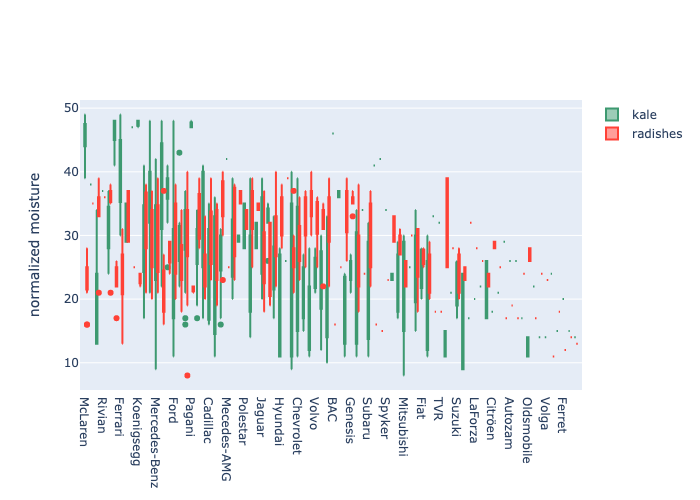

In [45]:
fig = go.Figure()

fig.add_trace(go.Box(
    y=df['Weekend_Total'],
    x=df['Brand'],
    name='kale',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=df['Daily_Total'],
    x=df['Brand'],
    name='radishes',
    marker_color='#FF4136'
))

fig.update_layout(
    yaxis_title='normalized moisture',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show("png")

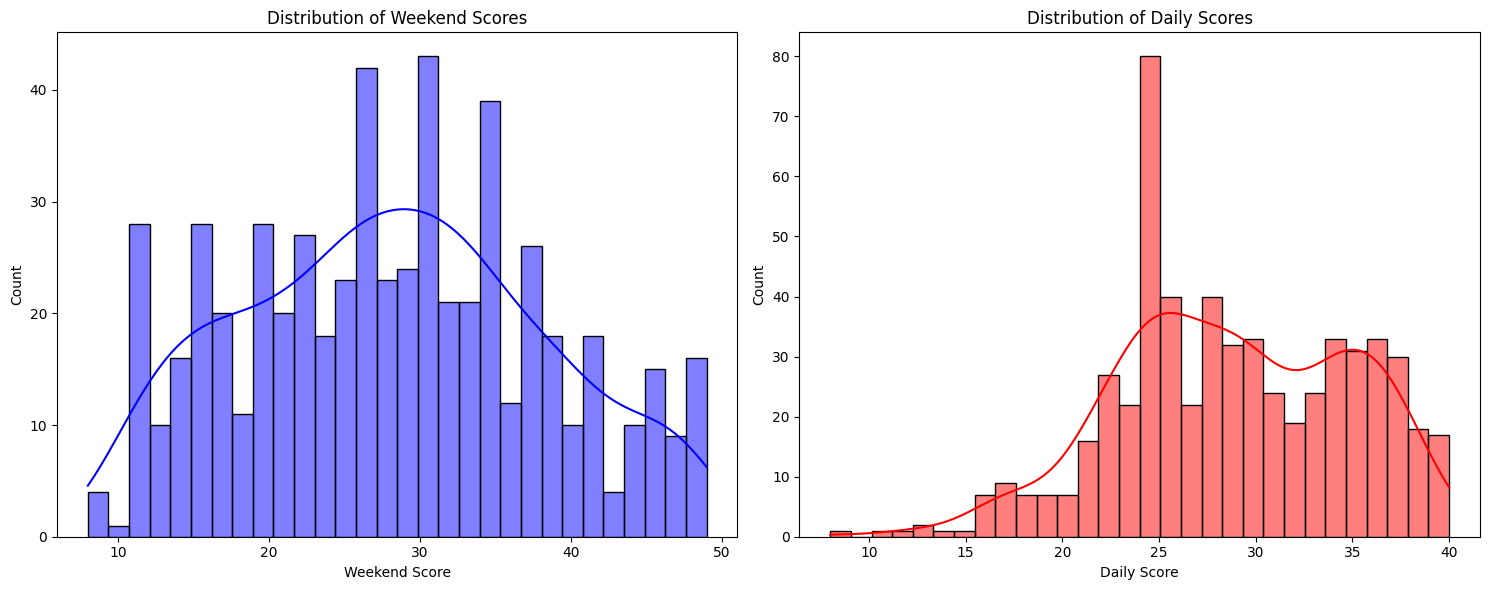

In [46]:
# Plotting histograms for Weekend and Daily Scores distribution
plt.figure(figsize=(15, 6))

# Histogram for Weekend Score distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Weekend_Total'], bins=30, kde=True, color="blue")
plt.title("Distribution of Weekend Scores")
plt.xlabel("Weekend Score")

# Histogram for Daily Score distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Daily_Total'], bins=30, kde=True, color="red")
plt.title("Distribution of Daily Scores")
plt.xlabel("Daily Score")

plt.tight_layout()
plt.show()

In [47]:
color_gradient = sns.color_palette("Blues", 10).as_hex()
color_gradient = list(reversed(color_gradient))

In [48]:
len(df['Brand'].unique())

84

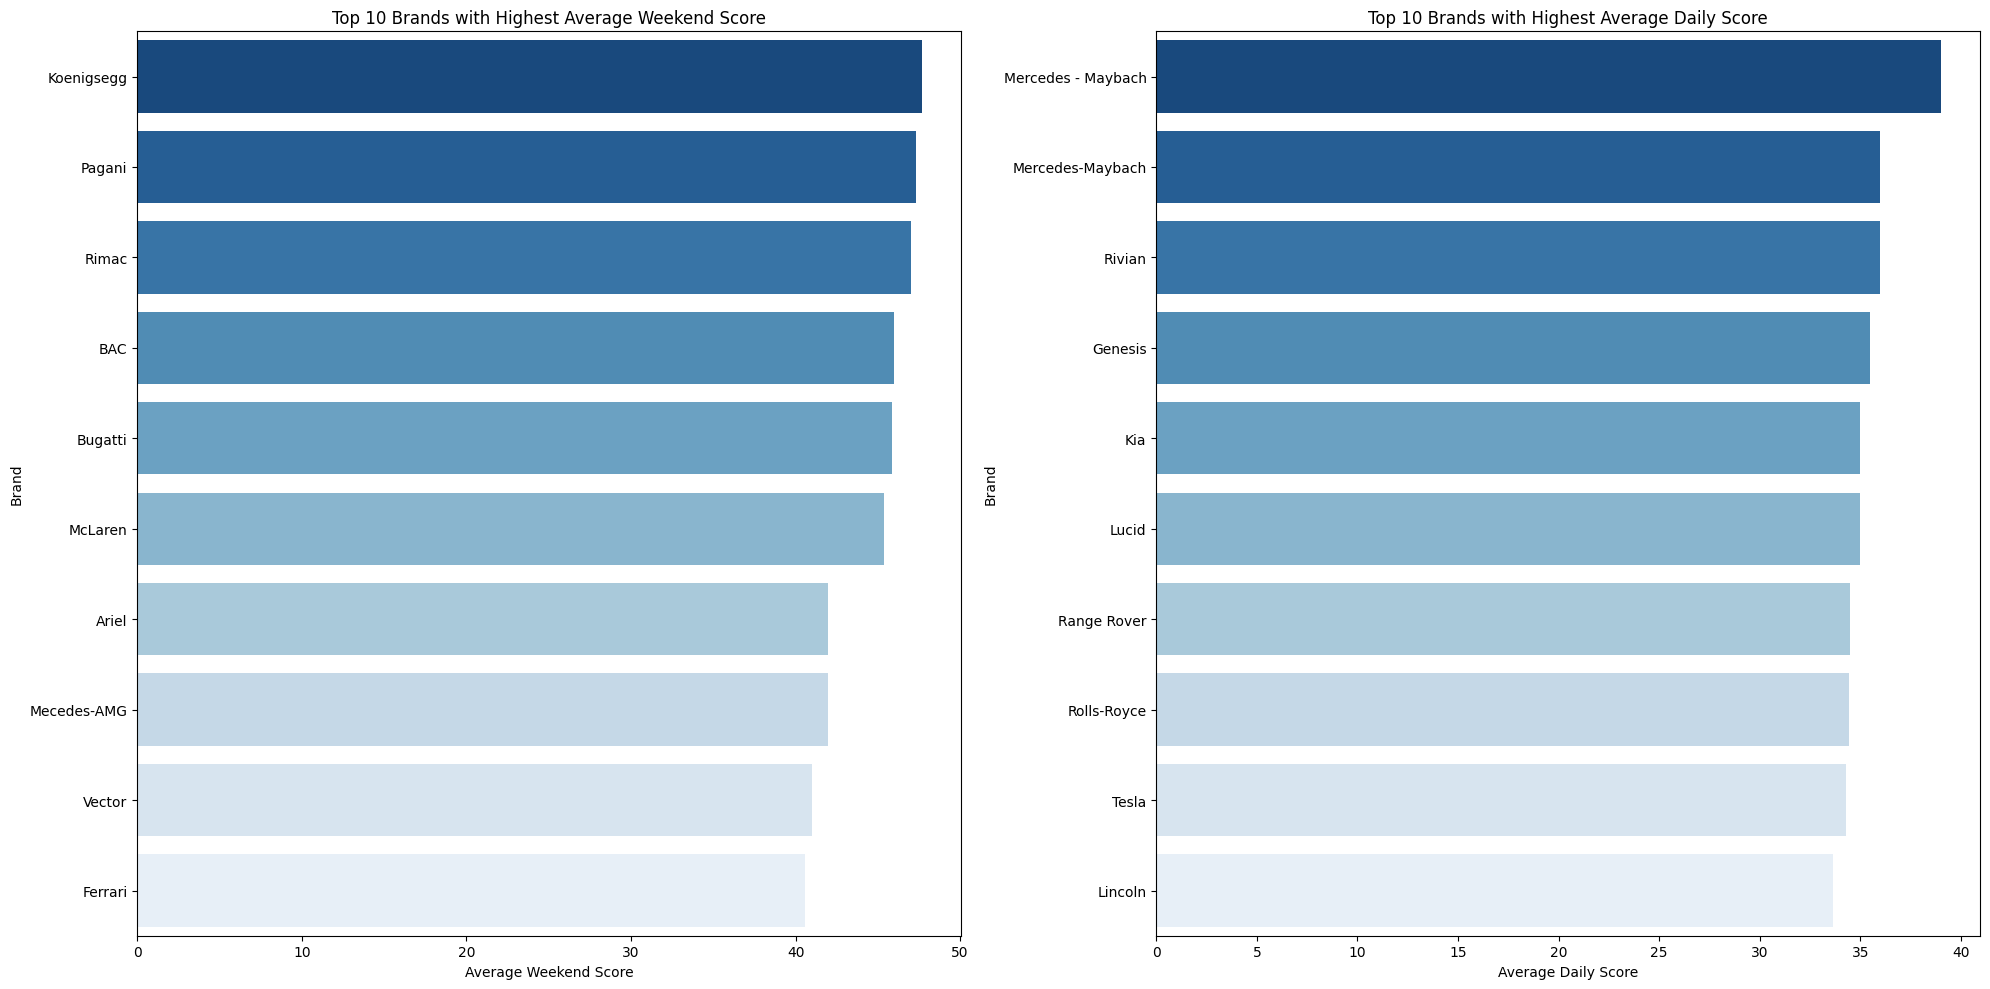

In [49]:
# Calculate the average scores for each brand
avg_scores_by_brand = df.groupby('Brand').agg({
    'Weekend_Total': 'mean',
    'Daily_Total': 'mean'
}).reset_index()

# Sort the brands based on average scores
top_weekend_brands = avg_scores_by_brand.nlargest(10, 'Weekend_Total')
top_daily_brands = avg_scores_by_brand.nlargest(10, 'Daily_Total')

# Plot the top 10 brands with highest average scores
plt.figure(figsize=(20, 10))

# Top 10 brands with highest average Weekend Score
plt.subplot(1, 2, 1)
sns.barplot(data=top_weekend_brands, y='Brand', x='Weekend_Total', palette=color_gradient)
plt.title("Top 10 Brands with Highest Average Weekend Score")
plt.xlabel("Average Weekend Score")

# Top 10 brands with highest average Daily Score
plt.subplot(1, 2, 2)
sns.barplot(data=top_daily_brands, y='Brand', x='Daily_Total', palette=color_gradient)
plt.title("Top 10 Brands with Highest Average Daily Score")
plt.xlabel("Average Daily Score")

plt.tight_layout()
plt.show()


### E) Weekend score, daily score, model year


In [50]:
# Grouping by Model_Year and calculating correlation between Weekend_Total and Daily_Total
correlation_by_year = df.groupby('Year').agg({
    'Weekend_Total': 'mean',
    'Daily_Total': 'mean'
}).reset_index()

correlation_by_year[['Weekend_Total', 'Daily_Total']].corr()


,Weekend_Total,Daily_Total
Weekend_Total,1.000000,0.195224
Daily_Total,0.195224,1.000000


/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_45502/911875573.py:14: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.



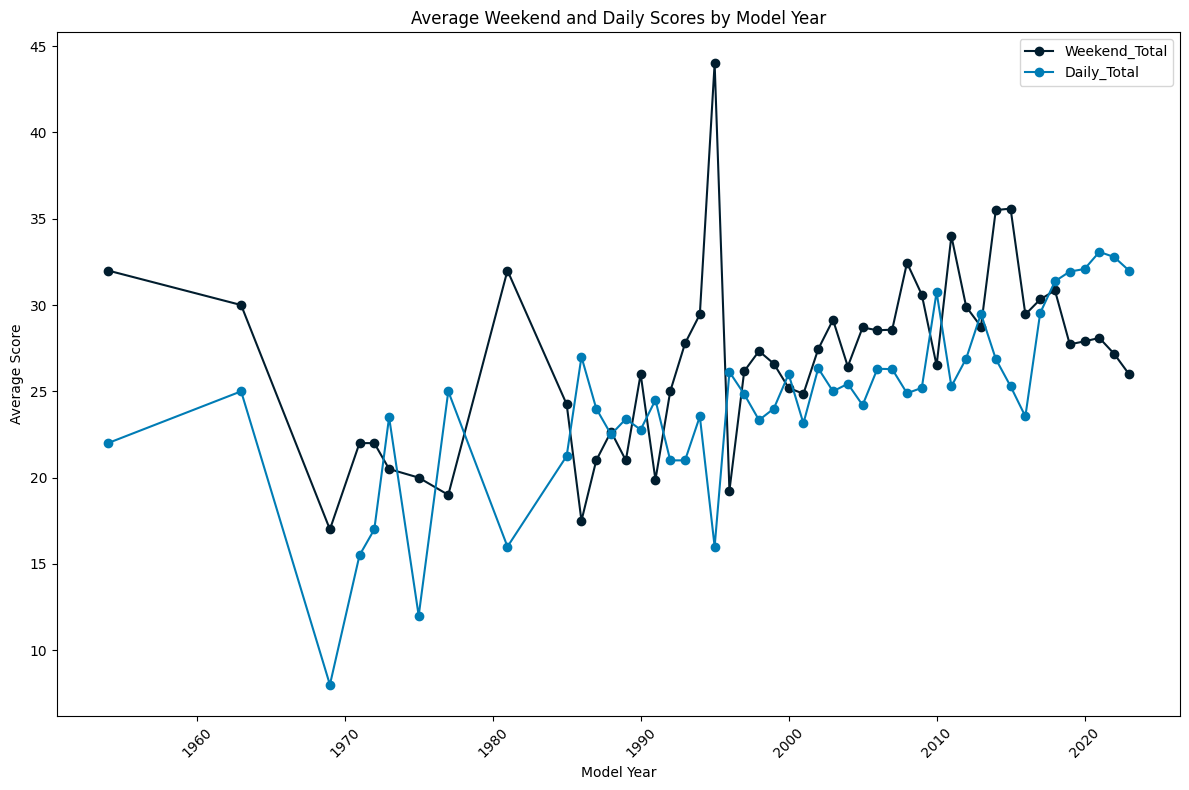

In [51]:
grouped_data = df.groupby('Year')[['Weekend_Total', 'Daily_Total']].mean().reset_index()

# Set up the figure
plt.figure(figsize=(12, 8))

# Plotting both Weekend_Total and Daily_Total on the same axes
plt.plot(grouped_data['Year'], grouped_data['Weekend_Total'], marker='o', color='#011d2e', label='Weekend_Total')
plt.plot(grouped_data['Year'], grouped_data['Daily_Total'], marker='o', color='#007cb5', label='Daily_Total')

# Title, labels, and legend
plt.title('Average Weekend and Daily Scores by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Score')
plt.grid(False, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)

# Display the plot
plt.show()


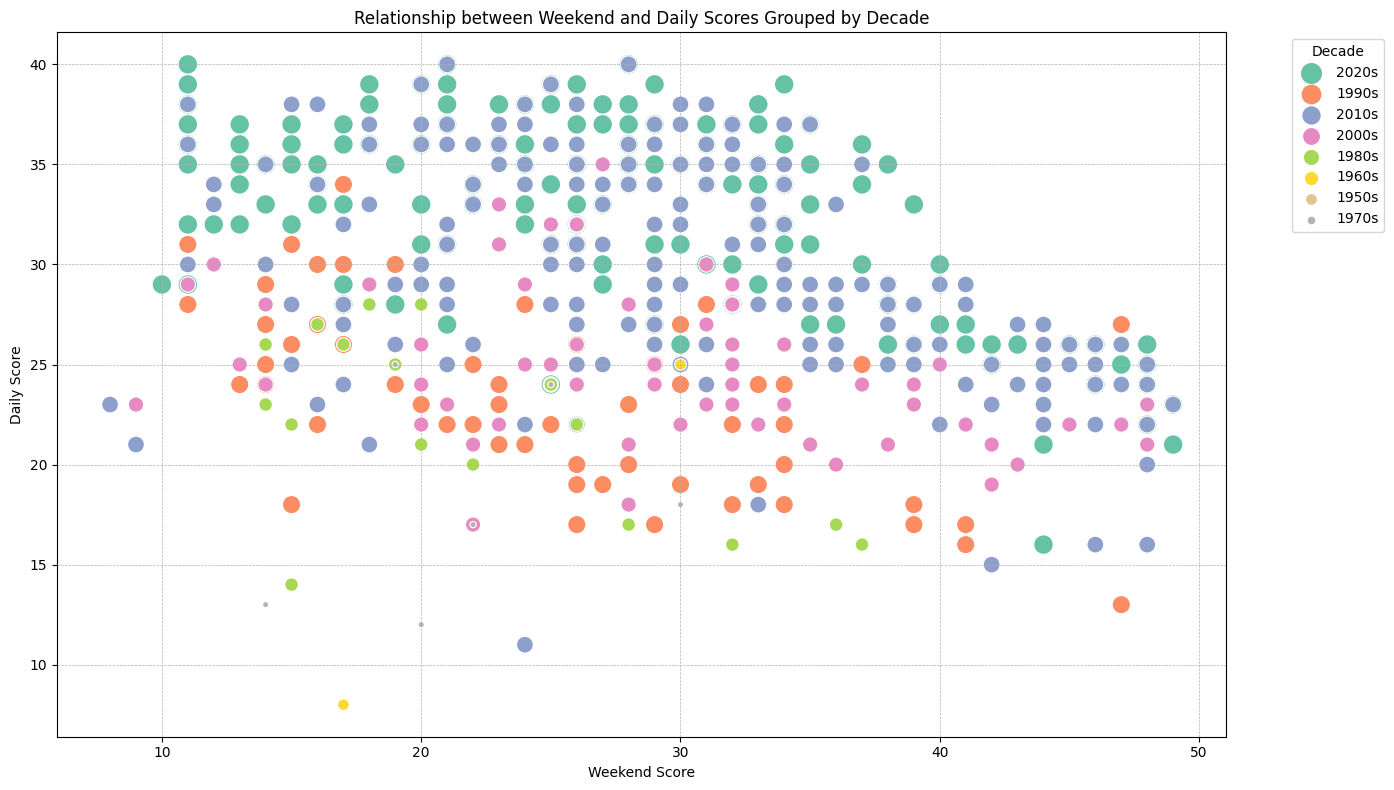

In [52]:
# Define a function to group years by decades
def categorize_by_decade(year):
    decade = int(year // 10 * 10)
    return f"{decade}s"

# Apply the function to create a new 'Decade' column in the dataframe
df['Decade'] = df['Year'].apply(categorize_by_decade)

# Set up the figure and axis
plt.figure(figsize=(14, 8))

# Create a scatter plot grouped by decade
sns.scatterplot(data=df, x="Weekend_Total", y="Daily_Total", hue="Decade", palette="Set2", size="Decade", sizes=(20, 200), legend="full")

# Title, labels, and legend configuration
plt.title("Relationship between Weekend and Daily Scores Grouped by Decade")
plt.xlabel("Weekend Score")
plt.ylabel("Daily Score")
plt.legend(title="Decade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
top_weekend_brands = df.nlargest(5, 'Weekend_Total')
top_daily_brands = df.nlargest(5, 'Daily_Total')

In [54]:
top_weekend_brands

,Year,Brand,Model,Styling,Acceleration,Handling,Fun_Factor,Cool_Factor,Weekend_Total,Features,...,DougScore,Video_Link,Filming_Location,State,Vehicle_Country,Average_A,Sum_Score,Average_B,Average_C,Decade
9,2020.0,Ferrari,Monza SP1,9.0,10.0,10.0,10.0,10.0,49.0,5.0,...,72.0,32:13:00,Thermal,California,Italy,6.000000,27.0,7.333333,9.000000,2020s
17,2015.0,Ferrari,LaFerrari,9.0,10.0,10.0,10.0,10.0,49.0,6.0,...,72.0,38:04:00,Los Angeles,California,Italy,5.666667,26.0,7.666667,8.666667,2010s
38,2020.0,McLaren,Elva,9.0,10.0,10.0,10.0,10.0,49.0,5.0,...,70.0,29:32:00,San Diego,California,UK,5.666667,26.0,7.333333,8.666667,2020s
0,2020.0,McLaren,Speedtail,8.0,10.0,10.0,10.0,10.0,48.0,7.0,...,74.0,38:57:00,Columbus,Ohio,UK,6.000000,25.0,8.000000,8.333333,2020s
7,2021.0,Bugatti,Chiron Pur Sport,9.0,10.0,9.0,10.0,10.0,48.0,6.0,...,73.0,31:04:00,Newport Beach,California,France,5.666667,26.0,8.000000,8.666667,2020s


In [55]:
top_daily_brands

,Year,Brand,Model,Styling,Acceleration,Handling,Fun_Factor,Cool_Factor,Weekend_Total,Features,...,DougScore,Video_Link,Filming_Location,State,Vehicle_Country,Average_A,Sum_Score,Average_B,Average_C,Decade
81,2020.0,Rolls-Royce,Cullinan Black Badge,6.0,6.0,4.0,5.0,7.0,28.0,10.0,...,68.0,29:28:00,San Diego,California,UK,5.333333,22.0,6.666667,7.333333,2020s
83,2019.0,Rolls-Royce,Cullinan,6.0,6.0,4.0,5.0,7.0,28.0,9.0,...,68.0,11:34,La Jolla,California,UK,5.666667,22.0,6.666667,7.333333,2010s
228,2022.0,Jeep,Grand Wagoneer,5.0,4.0,4.0,3.0,5.0,21.0,9.0,...,61.0,36:24:00,San Diego,California,USA,6.000000,18.0,5.333333,6.000000,2020s
230,2019.0,BMW,X7,6.0,4.0,4.0,3.0,4.0,21.0,9.0,...,61.0,27:11:00,Santa Ana,California,Germany,6.000000,18.0,5.333333,6.000000,2010s
404,2022.0,Kia,Carnival SX Prestige,5.0,1.0,3.0,1.0,1.0,11.0,8.0,...,51.0,23:57,San Diego,California,South Korea,6.333333,13.0,3.666667,4.333333,2020s


In [56]:
# Compute Eta squared for Weekend_Total with respect to Year
model_weekend = ols('Weekend_Total ~ C(Year)', data=df).fit()
anova_weekend = sm.stats.anova_lm(model_weekend, typ=2)

# For Weekend_Total
ss_total_weekend = sum((df['Weekend_Total'] - df['Weekend_Total'].mean())**2)
eta_squared_weekend_recomputed = anova_weekend["sum_sq"][0] / ss_total_weekend


model_daily = ols('Daily_Total ~ C(Year)', data=df).fit()
anova_daily = sm.stats.anova_lm(model_daily, typ=2)
# For Daily_Total
ss_total_daily = sum((df['Daily_Total'] - df['Daily_Total'].mean())**2)
eta_squared_daily_recomputed = anova_daily["sum_sq"][0] / ss_total_daily

eta_squared_weekend_recomputed, eta_squared_daily_recomputed


(0.09960770608515915, 0.4658452532758824)

In [57]:
df.columns

Index(['Year', 'Brand', 'Model', 'Styling', 'Acceleration', 'Handling',
       'Fun_Factor', 'Cool_Factor', 'Weekend_Total', 'Features', 'Comfort',
       'Quality', 'Practicality', 'Value', 'Daily_Total', 'DougScore',
       'Video_Link', 'Filming_Location', 'State', 'Vehicle_Country',
       'Average_A', 'Sum_Score', 'Average_B', 'Average_C', 'Decade'],
      dtype='object')

In [58]:
# Create a 'Decade' column to group the data by decade
df['Decade'] = (df['Year'] // 10 * 10).astype(int)

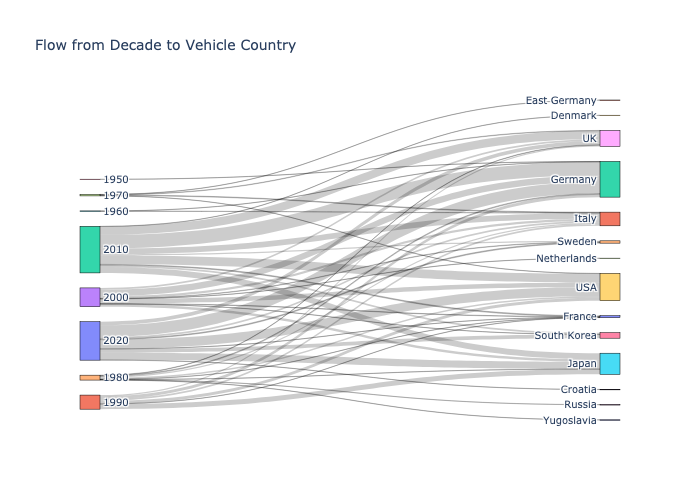

In [59]:
# Grouping data for Sankey diagram
sankey_data = df.groupby(['Decade', 'Vehicle_Country']).size().reset_index(name='count')

# Creating lists for source, target, and value for the Sankey diagram
source = sankey_data['Decade'].astype(str).tolist()
target = sankey_data['Vehicle_Country'].tolist()
value = sankey_data['count'].tolist()

# Creating a unique list of labels (decades + countries)
labels = list(df['Decade'].unique().astype(str)) + list(df['Vehicle_Country'].unique())

# Generating the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=[labels.index(s) for s in source],
        target=[labels.index(t) for t in target],
        value=value
    ))])

fig.update_layout(title_text="Flow from Decade to Vehicle Country", font_size=10)
fig.show("png")


In [60]:
country_avg_score = df.groupby('Vehicle_Country')['DougScore'].mean().reset_index()

country_avg_score

,Vehicle_Country,DougScore
0,Croatia,72.000000
1,Denmark,35.000000
2,East Germany,27.000000
3,France,61.555556
4,Germany,60.263473
5,Italy,61.234375
6,Japan,50.969697
7,Netherlands,57.000000
8,Russia,37.000000
9,South Korea,53.423077
